# Question 1

### [A] Prepare a table containing all of the activities that you plan to do in the city of your rotation, with a short, compelling justification of why they are interesting. 

The table need to include:

- At least 5 activities, each of which can be subdivided into 3 to k sub-tasks
- At least 3 culturally specific to your rotation city

| Activity | Description  | Sub-Tasks  | Justification  |
|----|---|---|---|
| Visit Tempelhofer Field   |Tempelholf is a former military airport which has been converted into a large park and an art museum   |Biking to Tempelhofer Field; Walking around the park; Visiting Tempelhofer Airport Museum; Biking Home|  Tempelhof Airport was one of the first airports in Berlin, and has a long and controversial history that mimics the development of the city. It was reconstructed by the Nazis, and served the city during the Cold War, before being converted to a park in 2008|
|Bake pumpkin bread  |Halloween is extremely popular in Germany, and baked pumpkin goods are everywhere  | Prep ingredients and proof yeast; Mix and knead; Allow to rise and pre-heat oven; Knead with flour; bake   | Germany is known for its baking, and bread features in almost every meal. During Halloween, the markets around my apartment sell lots of pumpkins, so making pumpkin bread seems appropriate | 
| Buy groceries at the Turkish market | The Turkish market is a Kreuzberg market that opens every Tuesday and Friday, and which sells Turkish food and groceries at extremely cheap prices. | Get out money; Bike to the Turkish Market; Buy groceries  | Kreuzberg is known for its multiculturalism, and the Turkish Market is one of the best examples of how different cultures coexist in Berlin. The first Döner was actually invented here! |
|Visit Berlin Fernsehturm|The Berlin Fernsehturm is a giant tower in the shopping area Alexanderplatz that's 368 meters tall | Cycle to Alexanderplatz; Go shopping; Take photographs of the tower; Watch a movie at the cinema complex; cycle home | The Fernsehturm is a famous site in Berlin that's visible from almost everwhere -- it's one of the city's most recognisable landmarks 
| Clean My Apartment| N/A |Talk to Junran; Wipe the tables; Sweep the floors; Listen to music; Make my bed | My apartment's messy and I have to clean it :( (and demonstrate how my scheduler can multi-task activities in the same context)

### [B] How will you store information about these activities and sub-tasks?

#### Activities vs. Sub-Tasks
My scheduler will need to be able to distinguish between activities and sub-tasks, because they differ in important ways. Firstly, activities do not have a duration: they are composed of sub-tasks, each of which have their own duration and priority. My approach to implementing this is outlined in detail in part [C]. In short, activities will be special instances of the Task class that are designated using a boolean argument, which controls how the code handles them.


#### Sub-Task Attributes
Each individual sub-task has to include several pieces of information. First, they require a duration, so that the scheduler can determine how much time has to be spent executing. They also require dependencies and a priority value. Using these two attributes, the scheduler can figure out how to order tasks to accomplish everything efficiently in the correct order (see below on how I approached that).

I decided to store dependencies as a Python list: accessing indices and values is simpler than accessing dictionaries or sets, and they have many methods for mutating data, which will be useful given how often we have to change dependencies.

A task id will also be essential, because it provides a unique identifier through which I can select, mutate and display tasks. I will use a status attribute to check the number of tasks which still require completion, allowing me to create breaking conditions for any iterative parts of my code.

#### Using Classes
I will represent sub-tasks through a Task class, for several reasons. The most important is that with a class I can manipulate the innate properties of the instances to avoid a lot of extraneous code. In particular, I can use the ```__lt__``` and ```__gt__``` magic methods so that ``<`` and ``>`` comparisons work using the priority attribute. This means I can create a heap using the actual instances themselves (rather than representations of them such as a list of task ids), simplifying state mutation significantly.

Another reason to use a class is that Tasks all have the same set of attributes, meaning I can prevent a lot of redundancy by creating an object type that captures them all. This also constrains user inputs to those I've already specified, making it harder to make an error when setting up the scheduler.

Finally, when building my task scheduler that can multi-task, I can use class inheritance to reuse most of the code from the first part of the assignment. This will make the class far more readable.

### [C] Describe how your scheduler will work, with an emphasis on why a priority queue is a well-suited data structure to handle the prioritisation of tasks, and how you have defined and computed the priority value of each task and/or sub-task.


### How the Scheduler Works

### Overall Approach
My overall approach works as following: the task scheduler is provided with a list of tasks. It finds those tasks that don't have any dependencies (indicating that they can be executed right now) and inserts them into a priority queue built using a min-heap, which uses each task's priority value to sort itself until the task with the minimum value (and thus the highest priority) is at the root node. It then executes that task, changes its attributes to reflect the fact that it's been executed, updates the dependencies of all remaining tasks, and repeats the series of steps above. This repeats until there are no more tasks left to execute.

This approach has several advantages over the naive solution, which would be a list that you sort according to priority value and then execute. Most importantly, it processes tasks dynamically across many iterations. This means it can avoid some of the  complicated logic of dependencies by only focusing on the relationships associated with each iteration. It also allows me to calculate priority values dynamically (at the point of insertion into the priority queue), which means that they incorporate only the information about tasks that's relevant at the point where they can be executed, which is what we care about. Finally, the use of a priority queue has time-complexity benefits, which I discuss below. One downside is that it requires more memory than an in-place sorting algorithm, but this is overweighed by the benefits described above (especially since a scheduler is not likely to have a list of tasks large enough to make memory a constraint).


## The Power of Priority Queues
The most important job of any task scheduler is to find the highest priority value as efficiently and quickly as possible. Priority queues excel at this.

Most of the time that you're operating a task scheduler, you have the following scenario: you have a data structure with a sorted number of tasks, and when dependencies update, new tasks are added and you have to insert them into their sorted positions, so that you can figure out what to do next.

If you're working with native Python iterable data structures -- lists and dictionaries -- you have to first compare the element with the sorted elements until you find a smaller value, and then you have to shift all elements that are larger than the newly inserted element. This has a time complexity of ``O(n)``, because it can require comparison with every element in the list depending on the value that was added..

With min-heap priority queues, you instead have to check each new node against its parent and swap while the node remains smaller.

In the markdown cell below, I derive the scaling growth of this operation: ``O(log n)``. Asymptotically, ``log n`` should always be smaller than ``n``, and so priority queues tend towards being more efficient than lists.

**Dealing with ``heappop()``**
Priority queues have one main complexity downside: the heappop() method used to  has a time complexity of ``O(log n)``, because after removing the minimum element, the heap has to be reordered to preserve the max-heap property. In contrast, removing the last item from a sorted array is ``O(1)``, because nothing else has to be changed.

We can look at the average case to see if the time complexity advantages are preserved.

We can imagine two task schedulers, one implemented with a heap and the other with a list, and both of which with an input list of size ``n``. We know that every task has to be removed from the scheduler exactly once, which has a time complexity of ``O(1)`` for the list and ``O(log n)`` for the heap. We also know that every task has to be inserted into the queue exactly once, which has a time complexity of ``O(n)`` for the list and ``O(log n)`` for the array. In the cell below, I graph the combination of these time complexities. As we can see, the heap implementation of the priority queue far outperforms the sorted array.

**Other Advantages**
Priority queues have other advantages over sorted lists. As mentioned above, they simplify much of the logic of dependencies and priority, by only processing executable tasks every iteration. They're excellent at handling task dependencies, because (in combination with a list) they only begin ordering tasks when they're executable. This makes the resulting code far more readable and easier to work with.


## The Priority Value
The most fundamental aspect of the priority value system is that, because I'm choosing to use a min-heap, the smallest value has the highest priority. This can be somewhat counter-intuitive, and so I will map possible values to a qualitative scale so that users don't have to understand the implementation in order to decide priority.

Next, the central question is: what should the task scheduler prioritise? What makes one task more important than another?

The obvious answer is: the most important tasks are those that the user designates as being most important. They have far more information than I do about what's important in their schedule, and so there should never be a case where I de-prioritise a task that they've prioritised.

There's an additional complication to this, however. Tasks only become available when their prequesities are completed, which means that completing a low priority task can "unlock" many high priority tasks, which the scheduler should want to complete as quickly as possible.

For example, imagine a scenario where the user sets one task as having medium priority -- cleaning the house -- and sets another to have a low priority: reading their algorithms textbook. Upon reading this textbook, however, they can start doing several extremely important tasks: submitting their make-up work, finishing their pre-class work for the next day, and starting their assignment.

To address this, I will code the priority value as follows: the priority will be updated just before the task is pushed into the priority queue (the only time at which all dependency relationships are guaranteed to be the final relationships for that task). To find each task's priority value, I'll look at all of the tasks that are dependent on it, and add their priority values to a running sum. I will then do so recursively for the dependents of those dependents, and so on until there are no more dependent tasks remaining. This will be added to the tasks own user-set priority. Finally, I'll take the negative of this value so that the largest values become smallest and vice-versa.  Effectively, with this approach I'm calculating the priority of the entire "sub-tree" of tasks with the active task as the root.

This might seem complicated, but it performs very well in important ways:
1. The user's input is always respected as the ultimate source of truth about priority, but the algorithm looks at future tasks in a way that humans can't easily to order tasks effectively.
2. Tasks which are prerequisites for many other tasks get prioritised
3. Tasks which have high priority dependents (recursively) get prioritised
4. Tasks which have many dependents which are high priority are prioritised most of all


This system will work especially well in cases with loose dependencies: those where many different tasks could be completed at the same time across several time steps. This type of scenario is exactly when task priority values become the most important: if you have a clear order in which to do things specified by dependencies, ranking priority has far less of an impact. When there are strongly defined dependencies, it works similarly to a basic user-set priority information.

This approach also fulfils another important criterion: it's practically useful. Most people can organise tasks using a simple quantitative priority scale, making a scheduler not that useful. This approach captures useful information that humans find it very difficult to determine: a recursive running sum of priority.

People naturally have a bias towards whatever seems the most exciting or the easiest to complete, and so this calculation is designed to counteract that impulse and prioritise tasks that lead to the biggest overall increase in value (satisfaction/happiness/work completed/etc.), taking into consideration future tasks as well as the current one.

**Note: This prioritisation algorithm is sometimes altered so that the scheduler can deal with activity context. See below for a detailed explanation of how this works!**

## Activities vs. Tasks (And Dealing with Context)
There are two broad categories of solutions for handling activities that I considered. First, I could designate activities as a separate class and track the completion of associated sub-tasks, marking each activity as complete as soon as their sub-tasks are. Second, I could represent each activity as a task of duration 0 which was a requirement for its subtasks.

Both approaches have obvious advantages: the former is more intuitive and allows me to easily track activity completion, while the latter takes advantage of existing code and incorporates activities into its priority calculations for each task (see below).

I actually tried both approaches, but quickly ran into several issues:
- When activities were represented as classes, it was extremely difficult to write the code to execute sub-tasks from several activities without completing the activity. Any effective scheduler should be able to do this.
- When activities were represented as tasks, their execution didn't make sense. Depending on the priority values of each task, the scheduler often gives an impossible series (e.g. telling me to begin breaking bread, then ride to Tempelhof, then clean my apartment).

My final solution ended up being much more complicated than I anticipated, but it combines the best aspects of modelling activities as Tasks and modelling activities through their own class.

It works like this: activities are modelled as tasks of duration 0 upon which all of their sub-tasks are directly or indirectly dependent. They are given the special designation ``activity`` at instantiation (through a boolean). This argument is used to track activity status by appending them to an activities list that gets checked every iteration.

This approach is a nice solution to part of the problem: I don't have to worry about creating a new class or changing much of my code, and it allows me to perform my recursive priority value calculation on activities as well as sub-tasks.

It leads to a critical issue, however: sub-tasks from different activities can execute one after the other in a way that doesn't work, like baking bread after cycling to Tempelhof.

I built out another system to handle these cases, which relies on the following principle: issues like this only emerge when the user changes context (where context here typically (but not always) means location). For example, I can perform certain tasks at home (cleaning; baking), and others at Alexanderplatz, but if I try and do one at home followed by another Alexanderplatz, that doesn't make sense.

To address this, I used another Task attribute: ``context_change``. For most sub-tasks, it's False -- it should only be set to True for an activity where you change context (e.g. it would be true for "biking to Alexanderplatz").

My code will do the following: when the scheduler executes a task with ``context_change==True``, it goes to the immediate dependencies of that task and sets their context_change argument to True. When calculating the task's priority, it sets it to negative one hundred thousand minus the priority value calculated above. In effect, it massively overprioritises tasks that exist in the same context, making sure they execute before anything else (I use -100,000 instead of -inf so that the priority comparison for sub-tasks within the same context still works).

This chain of activities will keep going until it runs out of dependencies, at which point it's assumed that the activity is over and that the context has reset. At this point, the normal prioritisation algorithm takes over.

This final approach can prioritise tasks across and within activities while preserving temporal logic.


### Starting Times
For the scheduler to work properly, the user has to be able to configure the start time, such that they could use it for varied time intervals (e.g. to plan study and breaks for a couple of hours; to plan a cultural immersion day, etc.) This should be human-interpretable.

### Note on Constrained Events
I'm choosing not to deal with events at specific times, because it's not required for my daily activities exploring Berlin culturally. In question [3], I outline the algorithmic steps that would be required for an implementation of constrained events.

### The Time Complexity of Heappush
The operation that we use when inserting a new task into the heap is ``Heap-Insert(A, key)``, which in the min-heap below is referred to as ``heappush(A, key)``.

This algorithm starts by increasing the size of the heap by 1, assigning the value of that new node as ``inf``, and then calling ``decrease_key()`` on that node. Everything except for ``decrease_key()`` occurs in constant time. ``decrease_key()`` moves the node up the tree while its value is smaller than that of its parent, and so the time complexity is equivalent to the size of the path traced from the node.

Since a heap of ``n`` elements is a binary tree, its height is:
$$\Theta(\log n)$$.

This means that ``heappush`` must have a time complexity of ``O(log n)``.


In [1]:
# PLOTTING THE TIME COMPLEXITY OF A HEAP AGAINST A LIST FOR INSERTION/REMOVAL OPERATIONS

import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(1, 10000)
x2 = np.linspace(1, 10000)

heap_scheduler = np.log(x1)+np.log(x1)
list_scheduler = 1+x2

plt.plot(x1, heap_scheduler, label = "Heap")
plt.plot(x2, list_scheduler, label = "List")
plt.legend()
plt.xlabel("Input size")
plt.ylabel("Asymptotic Growth")
plt.title("Plotting Time Complexity of Heap Against List")
plt.show()


<Figure size 640x480 with 1 Axes>

# Question 2

### [A] Program an activity scheduler in Python, which receives a list of tasks above as input and returns a schedule for you to follow
Don't use any external Python library besides ``pandas``, ``math``, and ``random``

The code in this cell was adapted from the code in lesson 5.2 of CS110.

In [2]:
class MinHeap:
    """
    Provides methods for creating and mutating a min-heap
    
    Inputs
    ---
    heap: list
        python list that is mutated by the class into a valid min-heap
    heap_size: int
             the length of the list. Used in many mutation methods
    """
    
    def __init__(self, heap):        
        self.heap = heap
        self.heap_size = len(heap)
    
    def __str__(self):
        """
        Magic method that returns a string representation of the heap array
        """
        return f"{self.heap}"
    
    def __len__(self):
        """
        Magic method that returns the length of the heap array: the 'heap_size'
        """
        return self.heap_size

    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node
        
        Works with Python indices.

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node

        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node.
        
        Works with Python indices.
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """

        return 2 * i + 2
		
    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """

        return (i - 1)//2

    def mink(self):     
        """
        Returns the smallest key in the priority queue. Works because the minimum
        value in a min-heap is always at the root node
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the smallest key in the priority queue
        """

        return self.heap[0]
    
    def heappush(self, key):  
        """
        Inserts a key into a priority queue and ensures that the min-heap property still holds
        
        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        self.heap.append(float("inf"))
        self.decrease_key(self.heap_size, key)
        self.heap_size += 1
        
    def decrease_key(self, i, key): 
        """
        Modifies the value of a key in a min priority queue
        with a smaller value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        if key > self.heap[i]:
            raise ValueError("new key is larger than the current key")
        self.heap[i] = key
        
        # swaps parent and child while the parent is larger than the child
        while i > 0 and self.heap[self.parent(i)] > self.heap[i]:
            self.heap[i], self.heap[self.parent(i)] = self.heap[self.parent(i)], self.heap[i]
            i = self.parent(i) # changes active node to the old index of the parent
                 
    def heapify(self, i):
        """
        Creates a min heap from the index given
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify

        Returns
        ----------
        None
        """
        
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]<heap[i]:
            smallest = l
        else:
            smallest = i
        if r <= (self.heap_size-1) and heap[r] < heap[smallest]:
            smallest = r
        if smallest != i:
            heap[i], heap[smallest] = heap[smallest], heap[i]
            self.heapify(smallest)
    
    def build_min_heap(self):
        """
        Turns the heap attribute into a min-heap, in place
        
        Parameters
        ----------
        None

        Returns
        ----------
        None
        """
        
        for i in range(self.heap_size//2, -1, -1):
            self.heapify(i)
    
    def check_min_heap(self):
        """
        Checks if the heap is a min-heap by building a min-heap from the heap, and checking
        whether it's the same as the original heap
        
        Parameters
        ----------
        None

        Returns
        ----------
        None
        """
        
        temp_heap = [*self.heap] # uses spread syntax to avoid mutable list issues with instance attributes
        self.build_min_heap()
        if self.heap == temp_heap:
            self.heap = temp_heap # resets the attribute, because mutation is in place
            return True
        else:
            self.heap = temp_heap
            return False
            
    def heappop(self):
        """
        returns the smallest key in the min priority queue and removes it 
        from the min priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the min value in the heap that is extracted
        """
        
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        mink = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return mink

In [3]:
## HEAP TESTS -- CHECKING IF THE CODE WORKS
import random

A = [5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8]

heap_test = MinHeap(A)
heap_test.build_min_heap()

# mink
assert(heap_test.mink() == 1)


# heappush
heap_test.heappush(6)
assert(heap_test.heap == [1, 3, 2, 4, 5, 7, 5, 8, 6, 9, 6, 7, 8, 6])


heap_test = MinHeap(A)
heap_test.build_min_heap()
# decrease_key
heap_test.decrease_key(5, -10)
assert(heap_test.heap == [-10, 3, 1, 4, 5, 2, 5, 8, 6, 9, 6, 7, 8, 6])

"""
Runs 1000 tests with lists constructed from randomly selected integers between -100 and 100.
Tests lists of different lengths, starting at 1 and increasing by 10 elements until reaching 100.
Tests with replacement, to see if duplicate values cause the heap to have issues.
"""
for list_length in range(1, 101, 10):
    for iterations in range(100):
        random_test = random.choices([i for i in range(-100, 100)], k=list_length)
        heap = MinHeap(random_test)
        heap.build_min_heap()
        assert(heap.check_min_heap() == True)


In [4]:
class Task:
    """
    
    Creates Task instances, which represent activities to be completed.
    
    Inputs:
    task_id: int
        unique identifier for the task
    description: str
        short description of the task
    duration: int
        duration of the task in minutes
    dependencies: list
        list containing all of the task ids of the tasks that depend on the Task instance
    priority: str
        priority level of the task: ['very low', 'low', 'medium', 'high', 'very high']
    status: str (choice)
        current status of the task
    activity: boolean
        indicates if the Task instance is an activity or a sub-task; defaults to False
    context_change: boolean
        indicates if the Task represents a change in context (location, time, etc.)
    """
    
    
    # Initializes an instance of Task
    def __init__(self, task_id, description, duration, dependencies, priority='very low', status="N", activity=False, context_change = False):
        
        # maps strings to priority values (gets inverted in the priority calculation)
        self.priority_map = {'very low': 1, 'low': 2, 'medium': 3, 'high': 4, 'very high': 5}
        
        self.task_id = task_id
        self.description=description
        self.duration=duration
        self.dependencies=dependencies
        self.priority = self.priority_map[priority]
        self.status=status
        self.activity=activity
        self.context_change = context_change
        
        # used to represent all of the information about a task
        self.longform = f"Task ID: {self.task_id} \n Task Description: {self.description} \n Task Duration: {self.duration} \n Task Dependencies: {self.dependencies} \n Task Status: {self.status} \n Priority: {self.priority}"
    
    def __repr__(self):
        return f"{self.task_id}"
    
    def __lt__(self, other): # custom < operation so that the heap methods work with Tasks & other data types
        if isinstance(other, Task):
            return self.priority < other.priority
        else:
            return self.priority < other
    
    def __gt__(self, other): # custom < operation so that the heap methods work with Tasks & other data types
        if isinstance(other, Task):
            return self.priority > other
        else:
            return self.priority > other

In [5]:
class TaskScheduler:
    """
    Parameters:
    tasks: list
        list of task objects to be executed by the scheduler
    priority_queue: MinHeap
        min_heap used to prioritise tasks for execution
    """
        
    NOT_STARTED = "N"
    IN_PRIORITY_QUEUE = "I"
    COMPLETED = "C"
    
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = MinHeap([])
        self.activity_list = []
       
    # This property and setter enforces the rule that the tasks attribute must be a list
    @property
    def tasks(self):
        return self._tasks
    
    @tasks.setter
    def tasks(self, t):
        if not isinstance(t, list): raise Exception("tasks attribute must be a list")
        self._tasks = t

    def print_tasks(self):
        """
        Prints the longform version of all tasks, including all relevant information
        """
        for task in self.tasks:
            print(task.longform)
    
    def print_priority_queue(self):
        """
        Prints a string containing the array that represents the min-heap priority queue
        """
        print(f"{self.priority_queue.heap}")
    
    def remove_dependency(self, task_id, context_change):
        """
        Removes the completed task from all remaining tasks for 
        which it's a dependency (in place).
        
        Parameters
        ---
        task_id: int
            Id of the task that was just completed
    
        Output
        ---
        None (in place mutation)
        """
        
        for t in self.tasks:
            if t.task_id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)
                
                # if the completed task was part of a special context and this task ends that context
                if context_change:
                   # stop the cycle for the next executed element
                    t.context_change = True
                
                    
    
    def recursive_priority_sum(self, active_task, dependency_sum):
        """
        Calculates a priority for active_task by recursively summing together the priorities of 
        all of the task's dependents with the task's own priorities. For tasks that represent
        
        
        Parameters
        ---
        active_task: Task instance
                   instance of Task for which priority is to be calculated
        dependency_sum: int
            running sum of all dependents
        """
        dependents = []
        for task in self.tasks:
            if active_task.task_id in task.dependencies:
                dependents.append(task)
        for dependent in dependents: # base case occurs when there are no more dependents
            dependency_sum += self.recursive_priority_sum(dependent, dependency_sum+dependent.priority)
        return dependency_sum
    
    def priority_sum(self, active_task, dependency_sum=0):
        """
        Implements recursive_priority_sum, adding active_task's own priority and dealing with
        context_change cases
    
        Inputs
        ---
        active_task: Task
            task instance for which priority is being calculated
        dependency_sum: int
            running sum of all of the values of the task's dependencies
        
        Outputs
        ---
        priority_value: numerical
            recursively calculated priority value
        """
        # if the task is in a different context, massively prioritise it
        if active_task.context_change:
            priority = self.recursive_priority_sum(active_task, dependency_sum)
            return -1000000 - priority - active_task.priority
        
        else:
            return -self.recursive_priority_sum(active_task, 0) - active_task.priority

    def update_priority_queue(self):
        """
        Updates the priority queue with tasks without dependencies (in place). Updates
        the priority of each task as it is added to the queue
        
        Parameters
        ---
        None
        
        Output
        ---
        None (in place mutation)
        """
        for task in self.tasks:
            # If task has no dependencies and is not yet in queue
            if task.status == self.NOT_STARTED and not task.dependencies:
                task.status = self.IN_PRIORITY_QUEUE
                task.priority = self.priority_sum(task) #calculate priority for task recursively
                self.priority_queue.heappush(task)
    
    def check_task_list(self):
        """ 
        Checks if there are any tasks which haven't started using the status attribute
        
        Parameters
        ---
        None
        
        Outputs
        ---
        boolean:
            True if at least one task has status = 'N', False otherwise
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False
     
    def format_time(self, time):
        """
        Converts number of minutes to human-readable time (hours and minutes)
        
        Parameters
        ---
        time: numerical
            time in number of minutes
            
        Outputs
        ---
        time: str
            time in number of hours and minutes
        """
        return f"{time//60}h{time%60:02d}"

    
    def run_task_scheduler(self, starting_time = 0):
        """
        
        Runs a task_scheduler. Continues running while there are tasks in the priority queue 
        or uncompleted tasks in tasks list. 
        
        Parameters
        ---
        starting_time: numerical
            beginning time for the scheduler in minutes
        
        Outputs
        ---
        None (prints schedule)
        
        """
        current_time = starting_time
        # self.priority_queue returns True if it's not empty

        while self.check_task_list() or self.priority_queue:
            self.update_priority_queue()
            if len(self.priority_queue) > 0:
                active_task = self.priority_queue.heappop()
                if active_task.activity:
                    # add activity to activity_list for monitoring
                    print(f"\033[1m [Started Activity: {active_task.description}] \033[0m")
                    self.activity_list.append(active_task)
                    self.remove_dependency(active_task.task_id, active_task.context_change)
                    active_task.status = self.COMPLETED

                else:
                    print(f"⏰Scheduler at time {self.format_time(current_time)} started executing task {active_task.task_id} that takes {active_task.duration} mins")
                    current_time += active_task.duration            
                    print(f"✅ Completed Task {active_task.task_id} - '{active_task.description}' at time {self.format_time(current_time)} PRIORITY: {active_task.priority} \n") 
                    
                    self.remove_dependency(active_task.task_id, active_task.context_change)
                    active_task.status = self.COMPLETED
        total_time = current_time - starting_time
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")
        
        

In [6]:
## TESTING THE SCHEDULER WITH A BASIC INPUT

tasks = [
    Task(0, 'get up at 8:00 AM', 10, [], priority = 'medium'),
    Task(1, 'get dressed and ready', 10, [0], priority = 'low'), 
    Task(2, 'eat healthy breakfast', 40, [0], priority = 'high'), 
    Task(3, 'make grocery list', 20, [0], priority = 'medium'), 
    Task(4, 'go to the market', 15, [1, 3], priority = 'medium'), 
    Task(5, 'buy groceries in list', 30, [4], priority = 'very high'), 
    Task(6, 'drive back home', 15, [5], priority = 'very low'), 
    Task(7, 'store groceries', 5, [6], priority = 'very low'), ]

my_schedule = TaskScheduler(tasks)

my_schedule.run_task_scheduler()


⏰Scheduler at time 0h00 started executing task 0 that takes 10 mins
✅ Completed Task 0 - 'get up at 8:00 AM' at time 0h10 PRIORITY: -552 

⏰Scheduler at time 0h10 started executing task 3 that takes 20 mins
✅ Completed Task 3 - 'make grocery list' at time 0h30 PRIORITY: -33 

⏰Scheduler at time 0h30 started executing task 1 that takes 10 mins
✅ Completed Task 1 - 'get dressed and ready' at time 0h40 PRIORITY: -32 

⏰Scheduler at time 0h40 started executing task 4 that takes 15 mins
✅ Completed Task 4 - 'go to the market' at time 0h55 PRIORITY: -21 

⏰Scheduler at time 0h55 started executing task 5 that takes 30 mins
✅ Completed Task 5 - 'buy groceries in list' at time 1h25 PRIORITY: -8 

⏰Scheduler at time 1h25 started executing task 2 that takes 40 mins
✅ Completed Task 2 - 'eat healthy breakfast' at time 2h05 PRIORITY: -4 

⏰Scheduler at time 2h05 started executing task 6 that takes 15 mins
✅ Completed Task 6 - 'drive back home' at time 2h20 PRIORITY: -2 

⏰Scheduler at time 2h20 sta

In [7]:
## TESTING THE SCHEDULER WITH MY ACTUAL INPUT
daily_schedule = [
    Task(0, "Visit Tempelhof Field", 0, [], priority = 'low', activity=True),
    Task(1, 'Bike to Tempelhof Field', 20, [0], priority = 'medium', context_change=True),
    Task(2, "Walk around the park", 30, [1], priority = 'very high'),
    Task(3, "Visit Tempelhof Airport Museum", 40, [1], priority = 'high'),
    Task(4, "Bike home", 20, [2, 3], priority = 'medium', context_change=True),

    Task(5, "Bake pumpkin bread", 0, [], priority = 'very low', activity=True),
    Task(6, "Prep ingredients and proof yeast", 15, [5], priority = 'medium'),
    Task(7, "Mix ingredients and knead bread", 10, [6], priority = 'medium'),
    Task(8, "Allow to rise and preheat oven", 40, [7], priority = 'medium'),
    Task(9, "Knead with flour", 5, [8], priority = 'medium'),
    Task(10, "Bake", 20, [9], priority = 'medium'),
    
    Task(11, "Buy groceries at the Turkish Market", 0, [], priority = 'low', activity=True),
    Task(12, "Get out money", 5, [11], priority = 'high'),
    Task(13, "Bike to the Turkish market", 10, [12], priority = "very high", context_change=True),
    Task(14, "Buy groceries", 10, [13], priority = 'high'),
    Task(15, "Eat lunch", 15, [13], priority='medium'),
    Task(16, "Bike home", 10, [14, 15], priority = 'very high', context_change=True),
    
    Task(17, "Visit Berlin Fernsehturm", 0, [], 'medium', activity=True),
    Task(18, "Cycle to Alexanderplatz", 5, [17], priority = 'very high', context_change=True),
    Task(19, "Go shopping", 20, [18], priority = 'high'),
    Task(20, "Take photographs of the tower", 10, [18], priority = 'medium'),
    Task(21, "Watch a movie at the cinema complex", 120, [18], priority = 'low'),
    Task(22, "Cycle home", 5, [19, 20, 21], priority ='very high', context_change=True),

    Task(23, "Clean my apartment", 0, [], priority = 'medium', activity=True),
    Task(24, "Talk to Junran", 15, [23], priority = 'very high'),
    Task(25, "Wipe the tables", 10, [23], priority = 'medium'),
    Task(26, "Sweep the floors", 15, [23], priority = 'medium'),
    Task(27, "Make my bed", 10, [23], priority = 'high'),
]

my_schedule = TaskScheduler(daily_schedule)

my_schedule.run_task_scheduler()

 [Started Activity: Visit Berlin Fernsehturm] 
⏰Scheduler at time 0h00 started executing task 18 that takes 5 mins
✅ Completed Task 18 - 'Cycle to Alexanderplatz' at time 0h05 PRIORITY: -1000164 

⏰Scheduler at time 0h05 started executing task 19 that takes 20 mins
✅ Completed Task 19 - 'Go shopping' at time 0h25 PRIORITY: -1000009 

⏰Scheduler at time 0h25 started executing task 20 that takes 10 mins
✅ Completed Task 20 - 'Take photographs of the tower' at time 0h35 PRIORITY: -1000008 

⏰Scheduler at time 0h35 started executing task 21 that takes 120 mins
✅ Completed Task 21 - 'Watch a movie at the cinema complex' at time 2h35 PRIORITY: -1000007 

⏰Scheduler at time 2h35 started executing task 22 that takes 5 mins
✅ Completed Task 22 - 'Cycle home' at time 2h40 PRIORITY: -1000005 

 [Started Activity: Buy groceries at the Turkish Market] 
⏰Scheduler at time 2h40 started executing task 12 that takes 5 mins
✅ Completed Task 12 - 'Get out money' at time 2h45 PRIORITY: -99 

⏰Scheduler at

### [B] In addition to the actual scheduler, provide at least one simple example to demonstrate how your scheduler prioritises tasks based on their priority value.

Let's imagine we're creating a list of chores to be completed over a given day, before you get to cycle to the river and go for a nice walk. At some point, we also need to do school work. This is a good example of the way that my scheduler deals with priorities, because it has lots of tasks that can be completed at any given time, so the order is decided more by the priority value than by the tasks' dependencies.

In [8]:
tasks = [
    Task(0, "Clean my apartment", 0, [], priority='medium', activity=True),
    Task(1, "Wipe the tables", 10, [0], priority='high'),
    Task(2, "Sweep the floors", 15, [0], priority='medium'),
    Task(3, "Make my bed", 10, [2], priority='very high'),
    
    Task(4, "Complete class prep", 0, [], priority='high', activity=True),
    Task(5, "Finish CS110 pre-class work", 40, [4], priority='very low'),
    Task(6, "Finish CS111 pre-class work", 40, [4], priority='very high'),
    Task(7, "Finish CS130 pre-class work", 40, [4], priority='medium'),
    Task(8, "Finish CS110 assignment", 120, [5], priority='very high'),
    
    Task(9, "Walk along the river", 0, [3], priority='very high', activity=True),
    Task(10, "Bike to the river", 10, [9], priority='medium', context_change=True),
    Task(11, "Walk along the river", 30, [10], priority='medium'),
    Task(12, "Bike Home", 10, [11], priority="medium", context_change=True)
]

my_schedule = TaskScheduler(tasks)

my_schedule.run_task_scheduler()

 [Started Activity: Clean my apartment] 
⏰Scheduler at time 0h00 started executing task 2 that takes 15 mins
✅ Completed Task 2 - 'Sweep the floors' at time 0h15 PRIORITY: -66 

 [Started Activity: Complete class prep] 
⏰Scheduler at time 0h15 started executing task 3 that takes 10 mins
✅ Completed Task 3 - 'Make my bed' at time 0h25 PRIORITY: -43 

 [Started Activity: Walk along the river] 
⏰Scheduler at time 0h25 started executing task 10 that takes 10 mins
✅ Completed Task 10 - 'Bike to the river' at time 0h35 PRIORITY: -1000012 

⏰Scheduler at time 0h35 started executing task 11 that takes 30 mins
✅ Completed Task 11 - 'Walk along the river' at time 1h05 PRIORITY: -1000006 

⏰Scheduler at time 1h05 started executing task 12 that takes 10 mins
✅ Completed Task 12 - 'Bike Home' at time 1h15 PRIORITY: -1000003 

⏰Scheduler at time 1h15 started executing task 5 that takes 40 mins
✅ Completed Task 5 - 'Finish CS110 pre-class work' at time 1h55 PRIORITY: -6 

⏰Scheduler at time 1h55 star

This example shows how my priority value organises tasks for a given day. The algorithm looks across activies to figure out what to prioritise. Although "Clean my apartment" has a lower priority than "Complete class prep", the activities bound to it (especially the "Walk Along the River" activity) have cumulatively higher priorities than those within "Complete class prep", and so it's executed first.

The algorithm then prioritises "Make the bed" because it's very high and it's directly tied to all the tasks in the "Walk along the river" activity. Then, the context_change logic takes over, and the priorities of the 3rd activity are massively boosted to make sure they all happen next.

Finally, the algorithm compares sub-tasks from the two remaining activities using the recursive probability calculation, prioritising those subtrees with the highest cumulative sum.

# Question 3

### [A] Describe as clearly as you can any changes you will need to make to the first version of the scheduler to include multi-tasking activities.

## Part 1: Changing Task Execution

The most fundamental change that I will make is the introduction of a data structure that we can use to store and execute multiple tasks as once. This is necessary because priority queues are only designed to extract one element at a time, and multi-tasking is antithetical to that property.

Here, I plan to use a list, because it has intuitive indexing and mutation methods for easy state manipulation (as opposed to a tuple or dictionary). It also has iterator methods, which here provide the simplest, most readable way to perform operations on a set of elements.

The overarching strategy will look like this: I'll create a dynamic list of active tasks that keeps track of all tasks that are some way through being executed. I'll keep on adding tasks to this list while the next task in the priority queue is multitaskable and I'm below some maximum number of tasks. 

Then, I'll execute tasks concurrently. Every time a task finishes, I'll update the durations of the remaining tasks, push new tasks to the priority queue, and check if there's a new element with maximum priority that can be multi-tasked, adding it to the active tasks list if it doesn't make the number of tasks to be executed at once too large.

### Code Implementation
**Part 1: Create an Active Tasks List**
1. Initialise an empty active tasks list
2. Pop an event from the priority queue and append it to the list
3. Check if this event has its multi_tasking argument set to True. Continue if it does.
4. Check if the subsequent task has its multi_tasking argument set to True
5. If it does, append it to the active tasks list
6. Keep on executing steps 3 through 5 until there are no more events in the priority queue or you hit a task that has multi_tasking set to False. This leaves you with a list of tasks that can be executed together.

**Part 2: Execute Tasks Concurrently, Updating Durations and Checking for New Tasks**
1. Print a line indicating that the execution of all tasks in the active tasks list has begun
2. Find the event with the shortest duration
3. Print a line indicating that you've executed it
4. Set new durations for all remaining tasks in the active task list
5. Remove the task that was just completed from the dependencies of all tasks not in the priority queue
6. Check for new tasks that might be multi-taskable (and which were dependent on the task that was just completed) by looking at the minimum, adding these tasks to the active-tasks list. This will only update the active tasks list if [a] the only remaining dependency of the new task was the task that was just completed, and [b] if the new task has the lowest priority value (and therefore highest priority) of every node in the min-heap.
7. Repeat this process until the active tasks list is empty and the root node task is not multi-taskable.

**Part 3: Dealing with other cases**
1. After popping the first element from the heap into the active tasks list (Part 1, step 2),  if it can't be multi_tasked, run the default code task execution code from Question 2

This approach has several advantages. Firstly, it reuses much of the code from my approach, improving code readability and making it less likely for bugs to occur. The only changes occur in some of the scheduling logic of run_task_scheduler().

Second, it only introduces one additional data structure (the active tasks list), and makes use of those  that I've already created: the iteratively updating priority queue and tasks list.

Third, it preserves the principles I've outlined above: it preserves the user's priority designations in all circumstances, and still calculates priority recursively.

## Maximum Number of Multi-Tasks
Obviously, there's also a maximum number of tasks that any human can accomplish at once, regardless of how simple they are. Cleaning the house while listening to a podcast is possible, whereas cleaning the house, listening to a podcast, and talking to a friend is not, even though each combination of two tasks is possible. To deal with this, I'll include a limit on the size of the active tasks list, limiting the total number of multi-tasks. By default, this will be set to 2, which seems a reasonable number for most scenarios, but this should be configurable by the user, to account for many different types of schedules.

### [B] Describe how constraints in the scheduling process are handled by a priority queue


To me, there are several main constraints in any task scheduling process:
1. Task have other tasks that they're dependent on
2. Some tasks can occur with each other, but not every task [conditional multi-tasking]
3. Some events happen at a specific time
4. Popping multi-taskable events

#### Dependencies
The most fundamental scheduling constraint is the idea that tasks have dependencies: other tasks that have to be completed before them. The priority queue system that I've created (in combination with a list) is an excellent data structure for handling this, because they allow you to only process executable tasks, decreasing the complexity of the code and making it far more readable. By incorporating a priority value calculation that includes information about tasks that remain dependent, you can maintain the simplicity of this approach while incorporating a more holistic prioritisatiton strategy.

#### Conditional Multi-Tasking
One significant constraint when multi-tasking is that, practically, some activities can be performed together while others cannot, even though they might all allow for multi-tasking (e.g. you can't brush your teeth and eat food at the same time, even though both tasks can be multi-tasked with other events).

There are only ever two reasons why tasks that the user labels as multi-taskable can't be executed together:
1. They have to occur in mutually-exclusive contexts (e.g. prepping bread ingredients [context: being at home] and walking through Tempelhof gardens [context: Tempelhof gardens])
2. The cognitive or physical effort of performing both tasks at once is too great to be feasible (e.g. having an in-depth conversation with a friend while practicing your juggling skills)

Each of these scenarios have different solutions.

**Case 1: Mututally Exclusive Contexts**
The dependency system of the priority queue can be used to circumvent case [1]. More specifically, dependencies should be used to encode different contexts into the task scheduler. 

For example, completing all tasks that occur at Tempelhof (i.e. all subtasks of the Temppelhof activity) might be a requirement for changing contexts (e.g. cycling back home) so that you can complete all activities within the home context. The scheduler then becomes a tool for prioritising what to do in each context. This is an incomplete solution: it requires determining in advance whether Tempelhof comes before or after being home.

Another way of implementing this is that every activity should involve a context-changing sub-task at the beginning and the end. For example, the first sub-task of the Tempelhof trip is cycling there, and the last sub-task is cycling back. This is the approach that I use when defining my tasks and dependencies, because it gives the scheduler much more flexibility when planning my day: activities no longer have to be linked to one another.

A true solution to this problem would be far too complex for this scheduler: it involves either the user or an artificial intelligence classifying the context in which each activity occurs: a difficult problem from the AI's perspective, and a far too cumbersome one from the users.

**Case 2: Cognitive or Physical Overload**
Case [2] is more challenging than case [1]. Even humans, who are far more advanced scheduling machines than my code, often misestimate the cognitive load of multi-tasking. An advanced scheduler might include an argument for each task that captured the amount of effort/attention required to complete it, and would then stop multi-tasking if the sum of this attention across all active tasks exceeded a threshold. This is extremely user-hostile, however (this estimation can be extremely difficult), and so I chose not to implement it.

Instead, I used the following principle: if two tasks are multi-taskable, but not with each other, the user should place a dependency relationship between them. This is a workable solution that covers the majority of cases.

### Time Constrained Events
My priority, as currently coded, doesn't handle time-constrained events. I chose not to implement this feature because nothing in my scheduled day occurred at a specific time and therefore required it. Here's how I'd build it if I were to include this feature:

- Create a constrained event argument
- Create a list of all constrained events
- change update_priority_queue so that it never pushes timed events to the priority queue unless the time check passes
- set the priority of the next constrained event equal to negative infinity (so that the algorithm prioritises the requirements for the timed event).
- If the first constrained event has no more dependencies, set the priority of the next constrained event equal to negative infinity and recalculate the priority of the first event so that it's its normal value
- When the constrained event executes, remove it from the list of constrained events.
- Change run_task_scheduler so that it checks the time remaining before the next scheduled event, and only executes the next event if there's enough time remaining before the scheduled event
- If there isn't enough time remaining, wait until the scheduled event, throw that to the priority queue (it will always be executed first because its priority is negative infinity), and then continue with normal events

### Popping multi-taskable events
One of the downsides of using a priority queue for multi-taskable events is that you can't look at all tasks in the priority queue to figure out which can be multi-tasked: you only have the mink() method. This is a constraint that you have to work within. 

I considered adapting the priority value to overemphasise multi-taskable activities, but when I did so, it violated my fundamental principle of priority: never disregard the user's own priority values, because they have far more information about what to prioritise. When I ran the code, this happened fairly often (e.g. prioritised extremely low priority task with no dependencies. I assumed that users would not want to be distracted during high priority activities by having to multi-task low priority activities, and so I ended up using the previous priority value.

# Question 4

### Write an activity priority scheduler with multi-tasking capability in Python, which receives as input a list of tasks and reports (outputs) a schedule for you to follow

In [9]:
class Task:
    """ 
    Creates Task instances, which represent activities to be completed.
    
    
    Inputs:
    task_id: int
        unique identifier for the task
    description: str
        short description of the task
    duration: int
        duration of the task in minutes
    dependencies: list
        list containing all of the task ids of the tasks that depend on the Task instance
    priority: str
        priority level of the task: ['very low', 'low', 'medium', 'high', 'very high']
    status: str (choice)
        current status of the task
    activity: boolean
        indicates if the Task instance is an activity or a sub-task; defaults to False
    context_change: boolean
        indicates if the Task represents a change in context (location, time, etc.)
    multi_tasking: boolean
        indicates if a task can be multi-tasked with other tasks
    """
    
    # Initializes an instance of Task
    def __init__(self, task_id, description, duration, dependencies, priority='very low', status="N", activity=False, context_change = False, multi_tasking = False):
        
        # maps strings to priority values (gets inverted in the priority calculation)
        self.priority_map = {'very low': 1, 'low': 2, 'medium': 3, 'high': 4, 'very high': 5}
        
        self.task_id = task_id
        self.description=description
        self.duration=duration
        self.dependencies=dependencies
        self.priority = self.priority_map[priority]
        self.status=status
        self.activity=activity
        self.context_change = context_change
        self.multi_tasking = multi_tasking
        
        # used to represent all of the information about a task
        self.longform = f"Task ID: {self.task_id} \n Task Description: {self.description} \n Task Duration: {self.duration} \n Task Dependencies: {self.dependencies} \n Task Status: {self.status} \n Priority: {self.priority}"
    
    
    def __repr__(self):
        """
        Magic method that governs the string representation of the object. In this case, replaces the __str__ method.
        Returns the task id, for ease of reference during logging, debuggin and output.
        """
        return f"{self.task_id}"
    
    def __lt__(self, other):
        """
        Magic method that defines the < comparison for a Task instance. Uses task priority for comparison.
        
        Input
        ---
        other: keyword
             the object against which the comparison is evaluated. Implicitely called during < evaluation
        
        Output
        boolean:
               True if the task's priority level is less than the other value, or False otherwise 
        """
        if isinstance(other, Task):  # comparisons with other tasks instances
            return self.priority < other.priority
        else: # comparisons with everything else
            return self.priority < other
    
    def __gt__(self, other):
        """
        Magic method that defines the > comparison for a Task instance. Uses task priority for comparison.
        
        Input
        ---
        other: keyword
             the object against which the comparison is evaluated. Implicitely called during > evaluation
        
        Output
        boolean:
               True if the task's priority level is greater than the other value, or False otherwise 
        """
        
        if isinstance(other, Task): # comparisons with other Task instances
            return self.priority > other
        else: # comparisons with everything else
            return self.priority > other

In [10]:
class MultiTaskScheduler(TaskScheduler):
    """
    Inherits from TaskScheduler. Changes the run_task_scheduler()method 
    to deal with multi-tasking. Adds a min_duration method to find the task
    with the minimum duration.
    """
    
    def min_duration(self, task_list):
        """
        Finds the task that has the minimum duration out of those in task_list
        
        Inputs
        ---
        task_list: list
            list of tasks
        
        Outputs
        ---
        min_index: int
            the index of the task in task_list with the minimum duration.
            Takes the first instance of the smallest duration if there's more than
            one task with the smallest duration
        """
        duration_list = []
        for task in task_list: # get all durations
            duration_list.append(task.duration)
        min_duration = min(duration_list)
        min_index = duration_list.index(min_duration) # find the index of the smallest duration
        
        return task_list[min_index]         

    
    def run_task_scheduler(self, starting_time = 0, max_multitask = 2):
        """
        Runs a task_scheduler. Continues running while there are tasks in the priority queue 
        or uncompleted tasks in tasks list. Multi-tasks by allowing for several active tasks 
        at once if they have the multi_task argument set to True, updates duration as tasks are completed.
        
        Parameters
        ---
        starting_time: numerical
            beginning time for the scheduler in minutes
        max_multitask: int
            maximum number of tasks that can be multi-tasked at any one time (inclusive)
        
        Outputs
        ---
        None (prints schedule)
        
        """
        current_time = starting_time
        # self.priority_queue returns True if it's not empty
        while self.check_task_list() or self.priority_queue:
            self.update_priority_queue()
            if len(self.priority_queue) > 0:
                
                # append first event to the active task list
                active_task_list = []
                active_task_list.append(self.priority_queue.heappop())
                
                if(active_task_list[0].multi_tasking):
                    # continue if there are more tasks to be immediately executed, or if more tasks can be multi-tasked
                    while (self.priority_queue and self.priority_queue.mink().multi_tasking) or active_task_list:
                        
                    # while subsequent events can be multi-tasked, append the number specified by the user to the active_tasks_list
                        while self.priority_queue and self.priority_queue.mink().multi_tasking and (len(active_task_list)<max_multitask):
                                next_multitask = self.priority_queue.heappop()
                                active_task_list.append(next_multitask)

                        ## Execute tasks in active tasks list
                        print(f"⏰Scheduler at time {self.format_time(current_time)} started/continued executing the following tasks:")
                        for task in active_task_list:
                            print(f" \t • Task Number {task.task_id} - {task.description} - which has {task.duration} minutes remaining")

                        # after each task finishes, update the remaining time, and check if there are any new multi-taskable events

                        # find task with minimum duration and execute it
                        completed_task = self.min_duration(active_task_list) 
                        current_time += completed_task.duration
                        print(f"✅ Completed Task {completed_task.task_id} - {task.description} - at time {self.format_time(current_time)}")
                        print(f"\n")
                        
                        #perform task cleanup
                        self.tasks[completed_task.task_id].status = self.COMPLETED # has to change the attribute list, not the temporary one
                        active_task_list.remove(completed_task)
                        
                        # update remaining durations
                        for task in active_task_list:
                            task.duration -= completed_task.duration
                        self.remove_dependency(completed_task.task_id, completed_task.context_change) # this might introduce new multi-tasks which can be completed in sequence
                        self.update_priority_queue()
                
                if(active_task_list != []):
                    active_task = active_task_list[0]
                    if active_task.activity:
                        print(f"\033[1m [Started Activity: {active_task.description}] \033[0m")
                        self.activity_list.append(active_task)
                        self.remove_dependency(active_task.task_id, active_task.context_change)
                        active_task.status = self.COMPLETED
                    else:
                        print(f"⏰Scheduler at time {self.format_time(current_time)} started executing task {active_task.task_id} that takes {active_task.duration} mins")
                        current_time += active_task.duration            
                        print(f"✅ Completed Task {active_task.task_id} - '{active_task.description}' at time {self.format_time(current_time)}\n") 
                        print(f'\n')
                        self.remove_dependency(active_task.task_id, active_task.context_change)
                        self.tasks[active_task.task_id].status = self.COMPLETED # has to change the attribute list, not the temporary one
        total_time = current_time - starting_time
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")

In [11]:
## TESTING THE SCHEDULER WITH A SIMPLE INPUT
tasks = [
    Task(0, 'get up at 8:00 AM', 10, [], priority = 'high', multi_tasking=True),
    Task(1, 'get dressed and ready', 10, [0], priority = 'low', multi_tasking=True), 
    Task(2, 'eat healthy breakfast', 40, [0], priority = 'medium', multi_tasking=True), 
    Task(3, 'make grocery list', 20, [0], priority = 'low', multi_tasking=True), 
    Task(4, 'go to the market', 15, [1, 3], priority = 'high'), 
    Task(5, 'buy groceries in list', 30, [4], priority = 'low'), 
    Task(6, 'drive back home', 15, [5], priority = 'medium'), 
    Task(7, 'store groceries', 5, [6], priority = 'medium'), ]

my_schedule = MultiTaskScheduler(tasks)

my_schedule.run_task_scheduler()

⏰Scheduler at time 0h00 started/continued executing the following tasks:
 	 • Task Number 0 - get up at 8:00 AM - which has 10 minutes remaining
✅ Completed Task 0 - get up at 8:00 AM - at time 0h10


⏰Scheduler at time 0h10 started/continued executing the following tasks:
 	 • Task Number 1 - get dressed and ready - which has 10 minutes remaining
 	 • Task Number 3 - make grocery list - which has 20 minutes remaining
✅ Completed Task 1 - make grocery list - at time 0h20


⏰Scheduler at time 0h20 started/continued executing the following tasks:
 	 • Task Number 3 - make grocery list - which has 10 minutes remaining
 	 • Task Number 2 - eat healthy breakfast - which has 40 minutes remaining
✅ Completed Task 3 - eat healthy breakfast - at time 0h30


⏰Scheduler at time 0h30 started/continued executing the following tasks:
 	 • Task Number 2 - eat healthy breakfast - which has 30 minutes remaining
✅ Completed Task 2 - eat healthy breakfast - at time 1h00


⏰Scheduler at time 1h00 started 

In [12]:
## TESTING THE SCHEDULER WITH MY ACTUAL INPUT
daily_schedule = [
    Task(0, "Visit Tempelhof Field", 0, [], priority = 'low', activity=True),
    Task(1, 'Bike to Tempelhof Field', 20, [0], priority = 'medium', context_change=True),
    Task(2, "Walk around the park", 30, [1], priority = 'very high'),
    Task(3, "Visit Tempelhof Airport Museum", 40, [1], priority = 'high'),
    Task(4, "Bike home", 20, [2, 3], priority = 'medium', context_change=True),

    Task(5, "Bake pumpkin bread", 0, [], priority = 'very low', activity=True),
    Task(6, "Prep ingredients and proof yeast", 15, [5], priority = 'medium'),
    Task(7, "Mix ingredients and knead bread", 10, [6], priority = 'medium'),
    Task(8, "Allow to rise and preheat oven", 40, [7], priority = 'medium',  multi_tasking=True),
    Task(9, "Knead with flour", 5, [8], priority = 'medium'),
    Task(10, "Bake", 20, [9], priority = 'medium'),
    
    Task(11, "Buy groceries at the Turkish Market", 0, [], priority = 'low', activity=True),
    Task(12, "Get out money", 5, [11], priority = 'high'),
    Task(13, "Bike to the Turkish market", 10, [12], priority = "very high", context_change=True),
    Task(14, "Buy groceries", 10, [13], priority = 'high'),
    Task(15, "Eat lunch", 15, [13], priority='medium'),
    Task(16, "Bike home", 10, [14, 15], priority = 'very high', context_change=True),
    
    Task(17, "Visit Berlin Fernsehturm", 0, [], 'medium', activity=True),
    Task(18, "Cycle to Alexanderplatz", 5, [17], priority = 'very high', context_change=True),
    Task(19, "Go shopping", 20, [18], priority = 'high'),
    Task(20, "Take photographs of the tower", 10, [18], priority = 'medium'),
    Task(21, "Watch a random movie at the cinema complex", 120, [18], priority = 'very high'),
    Task(22, "Cycle home", 5, [19, 20, 21], priority ='very high', context_change=True),

    Task(23, "Clean my apartment", 0, [], priority = 'medium', activity=True),
    Task(24, "Talk to Junran", 15, [23], priority = 'very high', multi_tasking=True),
    Task(25, "Wipe the tables", 10, [23], priority = 'medium', multi_tasking=True),
    Task(26, "Sweep the floors", 15, [25], priority = 'medium', multi_tasking=True),
    Task(27, "Make my bed", 10, [23], priority = 'high'),
]

my_schedule = MultiTaskScheduler(daily_schedule)

my_schedule.run_task_scheduler()




 [Started Activity: Visit Berlin Fernsehturm] 
⏰Scheduler at time 0h00 started executing task 18 that takes 5 mins
✅ Completed Task 18 - 'Cycle to Alexanderplatz' at time 0h05



⏰Scheduler at time 0h05 started executing task 21 that takes 120 mins
✅ Completed Task 21 - 'Watch a random movie at the cinema complex' at time 2h05



⏰Scheduler at time 2h05 started executing task 19 that takes 20 mins
✅ Completed Task 19 - 'Go shopping' at time 2h25



⏰Scheduler at time 2h25 started executing task 20 that takes 10 mins
✅ Completed Task 20 - 'Take photographs of the tower' at time 2h35



⏰Scheduler at time 2h35 started executing task 22 that takes 5 mins
✅ Completed Task 22 - 'Cycle home' at time 2h40



 [Started Activity: Buy groceries at the Turkish Market] 
⏰Scheduler at time 2h40 started executing task 12 that takes 5 mins
✅ Completed Task 12 - 'Get out money' at time 2h45



⏰Scheduler at time 2h45 started executing task 13 that takes 10 mins
✅ Completed Task 13 - 'Bike to the Turki

# [Q5] It's time to take your data scheduler for a spin. Use it to plan your day considering the constraints highlighted in the assignment. Use this as an opportunity to effeciently plan a day where you explore your city of rotation

## [A] Produce a critical analysis of your scheduler, including pictures you take for this test drive highlighting:
- All the benefits in following the algorithmic directives defined in the instructions (rather than deciding on the spot where to go next)
- And any failure modes and/or limitations you envision it running into.

The scheduler ended up actually being very useful, both in deciding the order for my activities and the order in which I completed the sub-tasks. First, it made me prioritise activities based on how important the tasks in them were. Because I designated many tasks within the activity "Visit the Berlin Fernsehturm" as being highly important, for example, it chose to complete that first.

It was also useful for balancing tasks from different activities. When I had to bake bread and clean my apartment in the afternoon, it ended up working surprisingly well. It interspersed tasks from both activities really well. Specifically, it's much better than I am at figuring out which tasks to do to "unlock" more important tasks later on. For example, it puts "Wipe the tables" and "Talk to Junran" early to allow me to complete tasks 26 and 27.

I noticed a few limitations while I was using it. Most noticeably, the scheduler is defined to complete every task as quickly as possible, without breaks in between. This meant that, if I mis-estimated the time required for an activity or ended up having to do other things, the specific timings of the schedule were off: it was a super frenetic day. The schedule also doesn't have a lot of information that I use to make decisions. For example, Tempelhof and Alexanderplatz are in opposite directions from my apartment, so it doesn't really make sense to cycle from one to the other when I still have tasks to complete at home.

The biggest limitation was that it can't handle constrained event times. For example, if I wanted to watch a movie at Alexanderplatz, the scheduler couldn't account for that.

It also runs into a soft failure mode if I don't encode multi-taskable actions effectively: one time I ran it and  it told me to wipe the tables and vaccuum the floors at the same time. This is difficult to avoid completely without an AI/human level understanding of what tasks require, as I write about above.

### Making Pumpkin Bread (As a Knot)

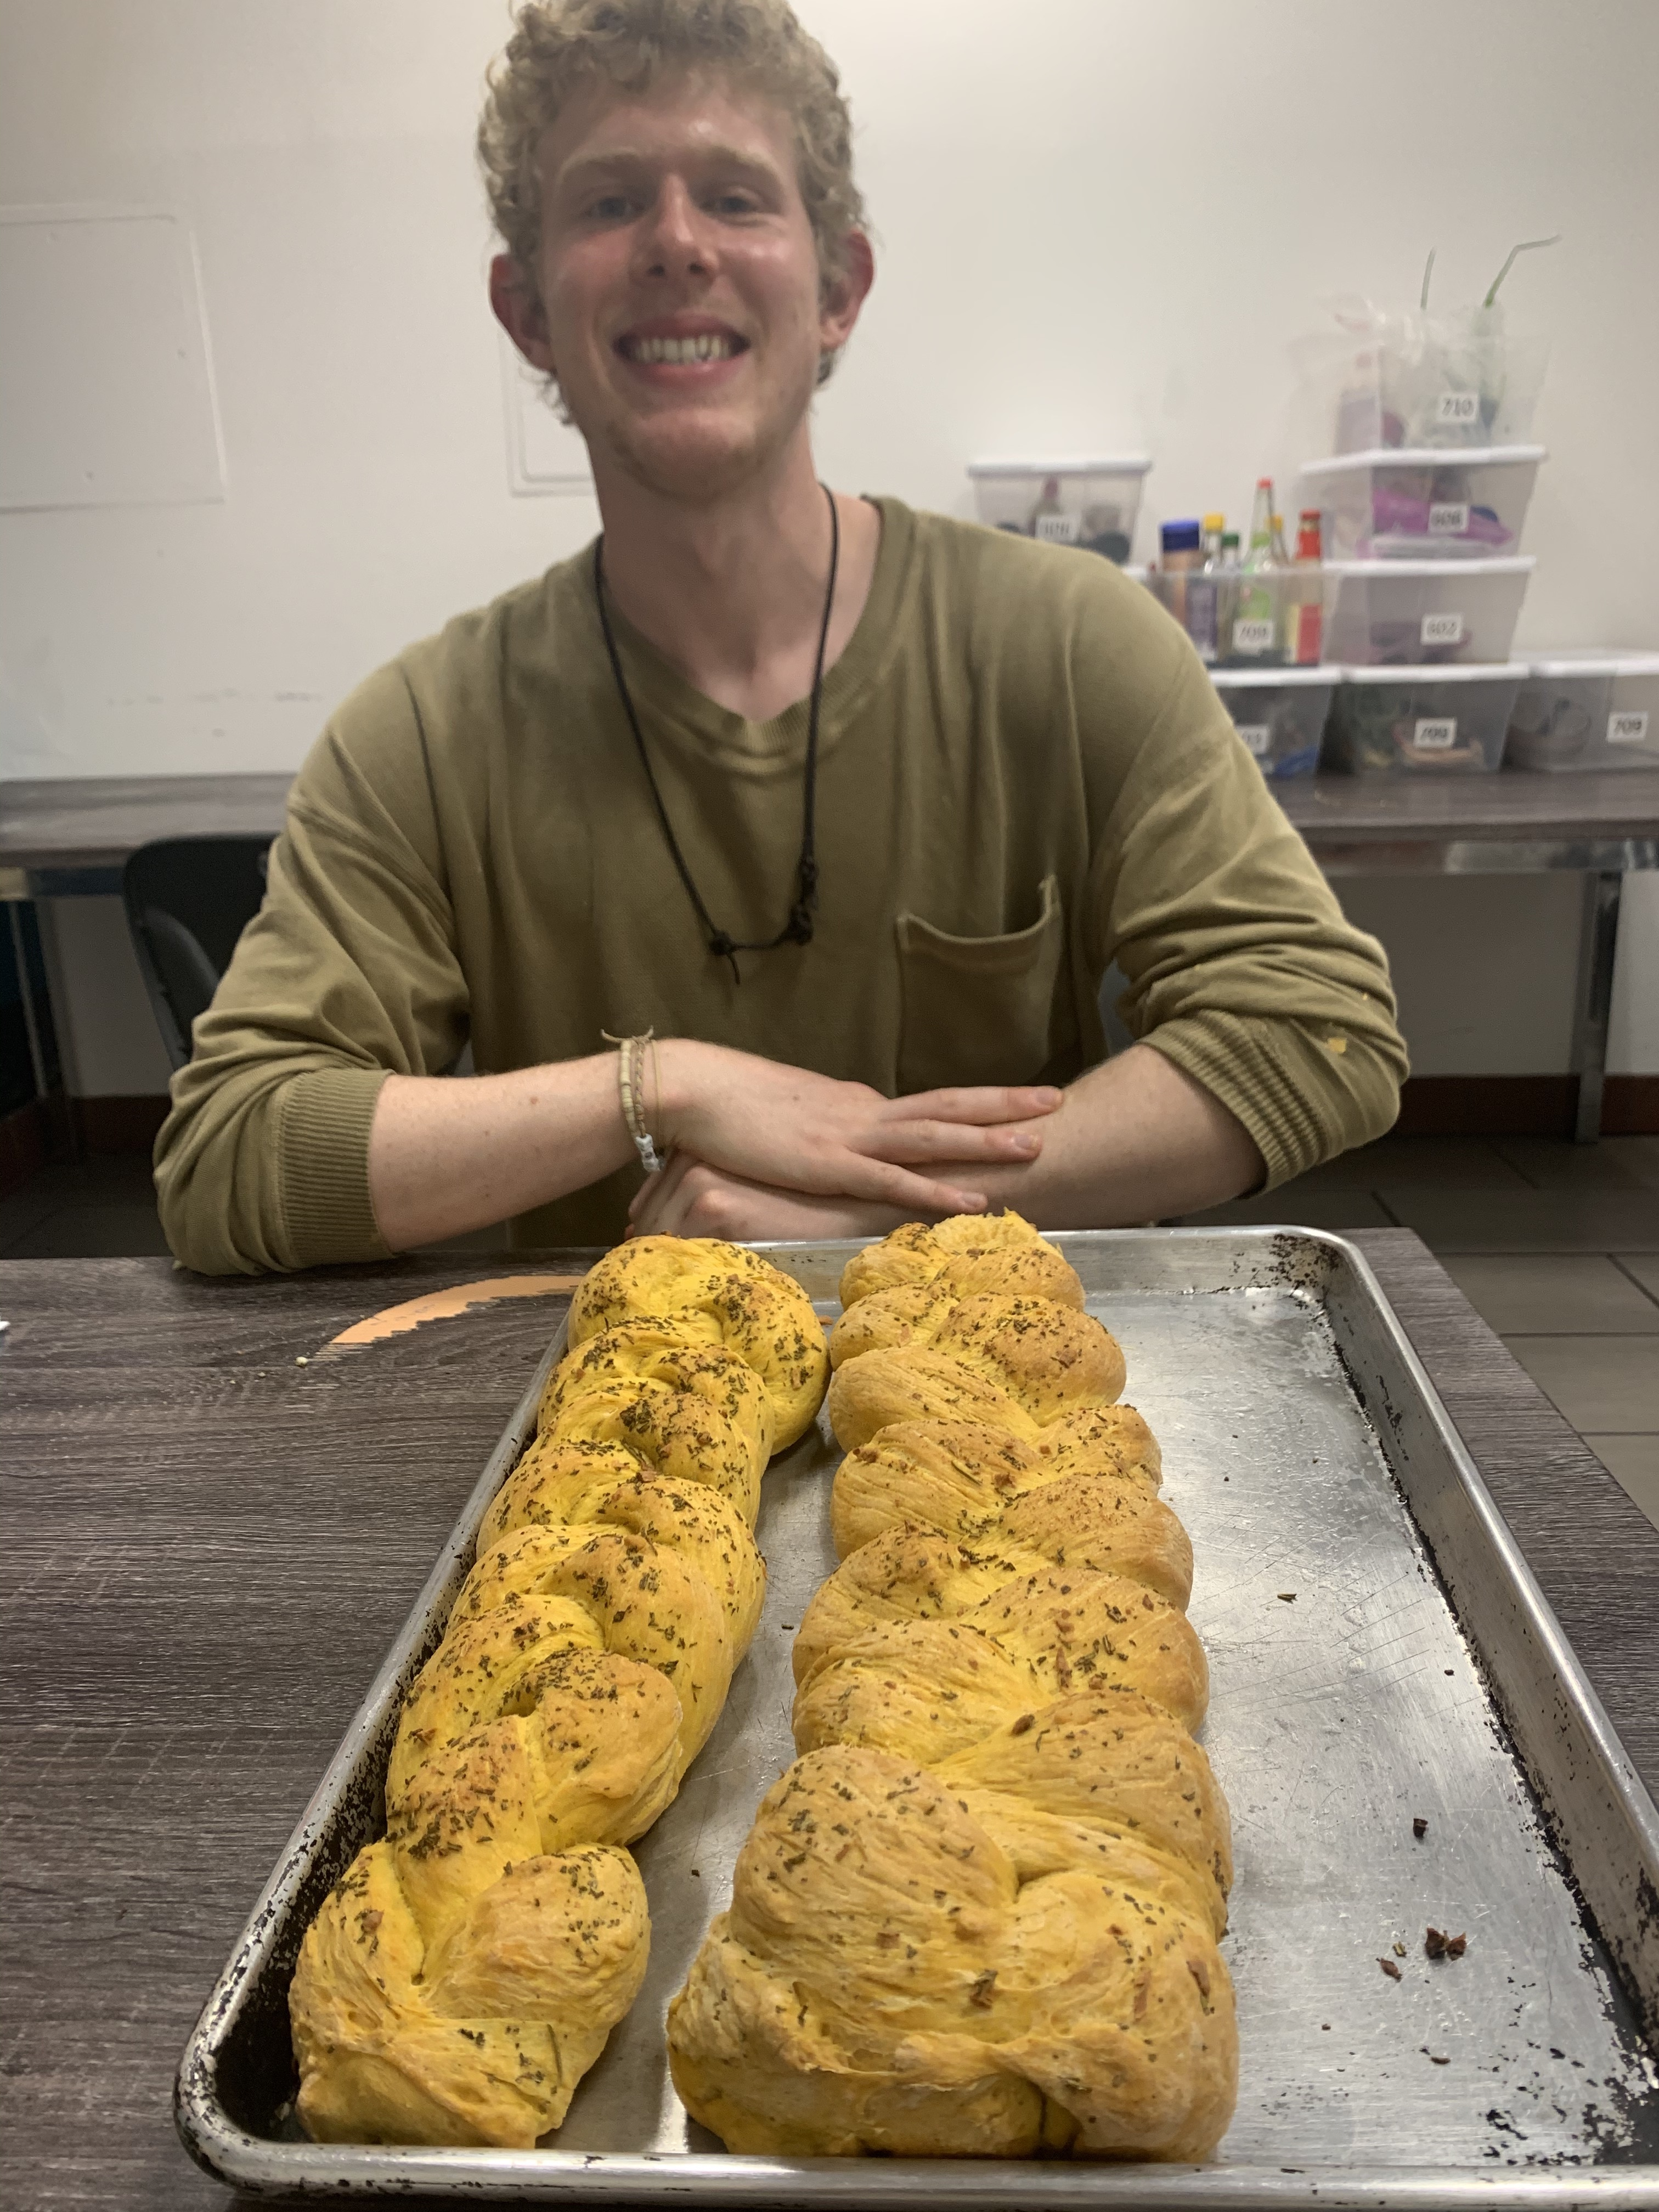

In [13]:
from IPython.display import Image
Image("pumpkin-bread.png")


### After Cleaning my Apartment

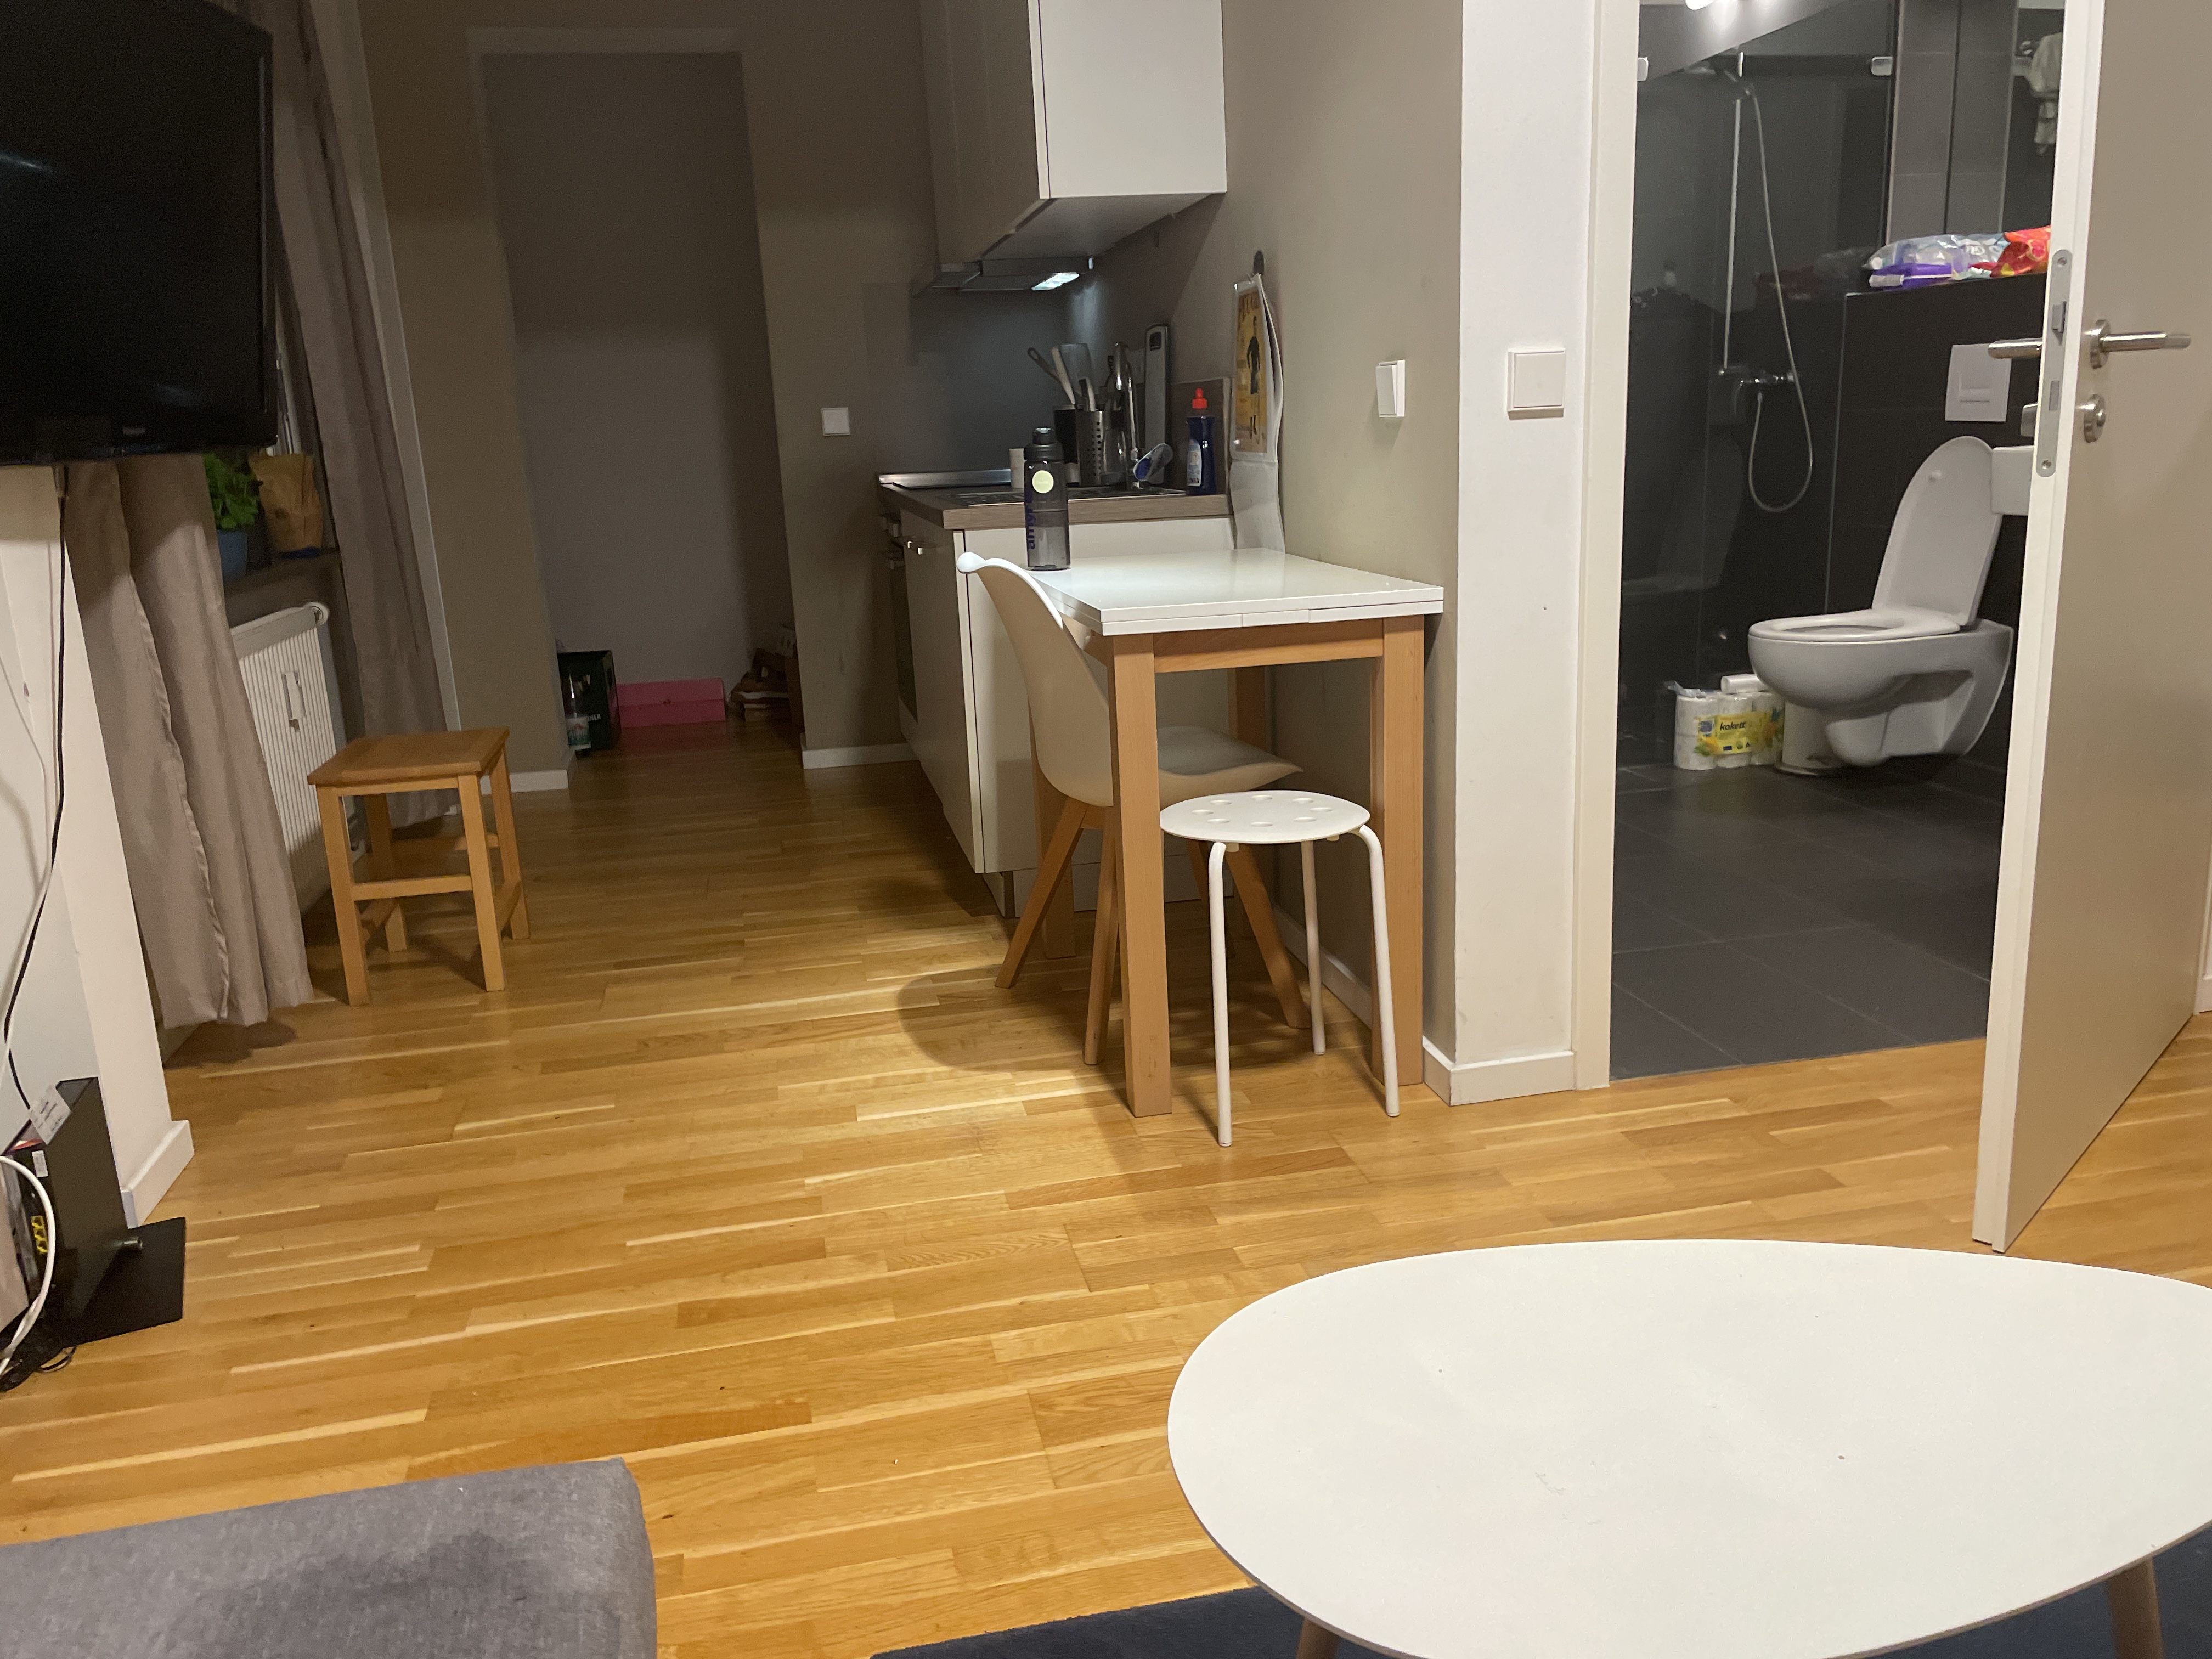

In [14]:
Image("clean-apartment.jpg")


### Getting Lunch at the Turkish Market

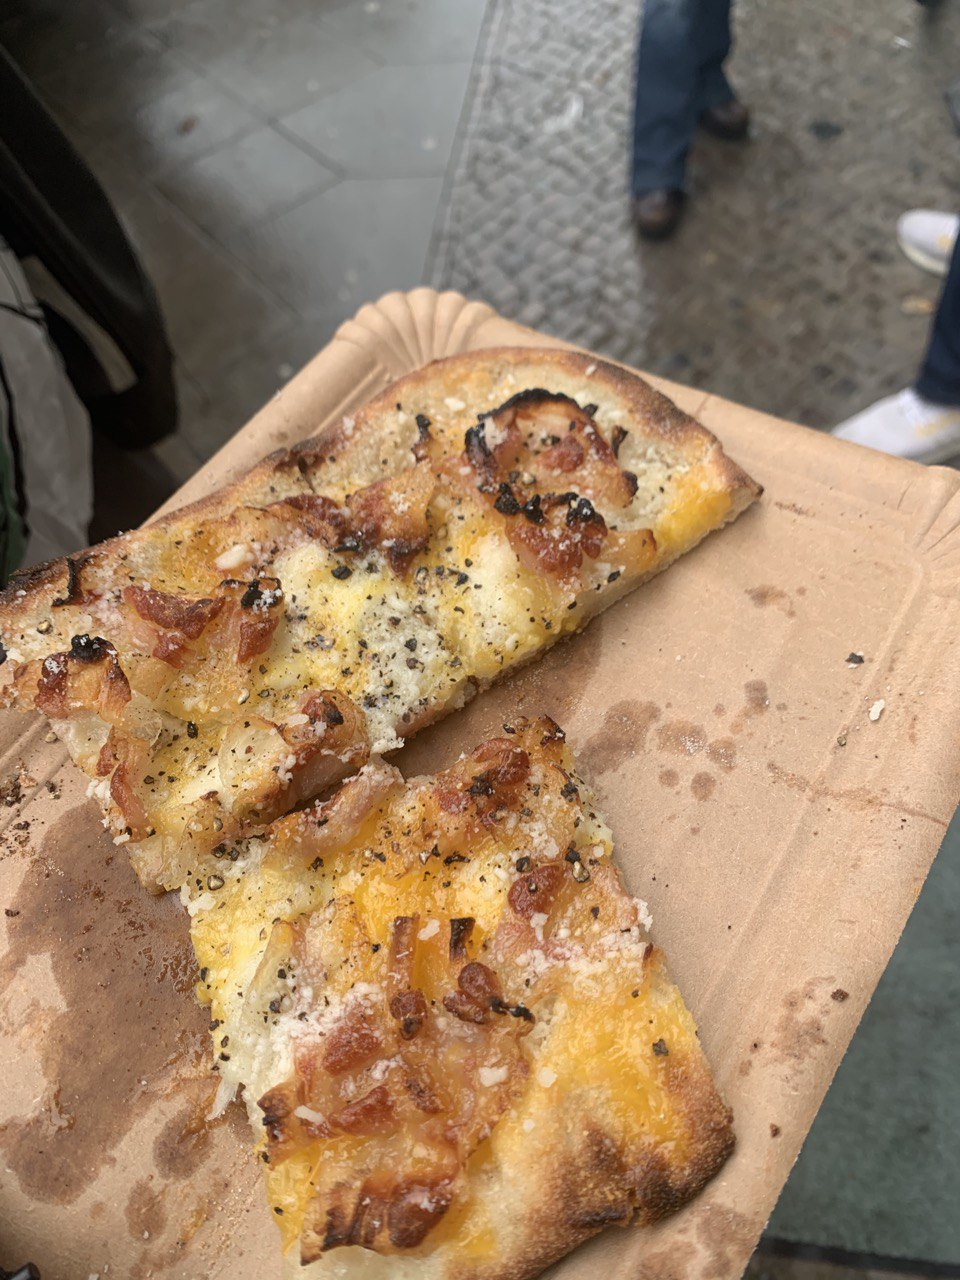

In [15]:
Image("pizza-lunch.jpg")

## [B] Examine the efficiency of your schedule (not the scheduler) and include any explicit reference to the metrics you employed to determine this

There are several measures I could use to assess the efficiency of my schedule:

- Wasted time/Wasted movement
- Task prioritisation

**Wasted Time/Wasted Movement**
I can use the amount of wasted time and movement to assess the efficiency of my schedule. On the whole, the order of activities wasted very little of either. I cycled only as far as was required, because Tempelhof is very close to the Turkish Market. 

**Task Prioritisation**
Another measure of efficiency is task priorisation: did my schedule prioritise tasks that needed to be completed more quickly. On the whole, it did so: it prioritised activities like visiting the Berlin Fersehturm that I rated highly, and de-prioritised others like visiting Tempelhof that I de-prioritised. It also prioritised tasks that were rated highly and were prerequisites for other tasks, such as watching a random movie.

## [C] Will you start using your algorithm to schedule your day?

Potentially yes, but only for a limited set of tasks. The scheduler has a complicated user interface and set of dependencies, and it's not really necessary for the type of activities that I would perform to explore the city, such as cycling to Tempelhof or watching a movie at Alexanderplatz. These tend to occur in many different places and to be tightly constrained (they generally involve travelling somewhere, doing a couple of activities in a semi-ordered fashion, and then travelling back). This makes a scheduler less useful, because it's easier (and more fun) to spontanteously figure out what to do next.

The code I build is much better for situations where there are many possible tasks to do at any one time interval, each of which has a set importance with a complicated dependency structure. A perfect example of this is classwork: I have many different pre-class works and assignments and readings to finish from several classes, and they're often dependent on each other. 

The scheduler is excellent for this because it prioritises tasks based on their dependencies. At any given time, it will tell me to do the work that results in the largest overall progress being made. This is exactly the type of thinking that I should be using when completing schoolwork, so it works well. The user would have to hardcode the different deadlines of the work into the user-set priority value, but I think if I can do that properly, it would work really well.

# HC Appendix
**#algorithms:** throughout this assignment, I outlined and justified several algorithmic strategies before implementng them. When calculating priority values, I implemented a complex algorithm that recursively uses user-set priority values to create a running sum that represents the total value of a 'sub-tree' of dependencies. I justified this choice in detail, highlighting how it provides more accurate prioritisation in cases where there are many tasks for each iteration of the task scheduler, and that it supplements human decision-making by performing a task that humans are generally bad at (recursive addition). I also used the same priority value to encode other constraints in the task scheduling process (events that exist in different contexts), justifying in detail how context defines the tasks that can be executed. This justification was provided through text, docstrings, and comments across my assignment.

**#constraints:** throughout the assignment, I identified constraints and leveraged constraint satisfaction to build my task scheduler. In my justifications, I distinguish between constraints (e.g. dependencies, contexts, differences between tasks and activities, multi-tasking) and obstacles (e.g. dynamic priority values, executing multiple tasks at once despite only having access to heappop(), comparison of class objects). I analyse these constraints in detail, outlining both algorithmic and conceptual steps to incorporate them into my solution. Finally, I implement my solutions in light of these constraints, building and testing my scheduler to make sure that it does actually satisfy the requirements that I've derived through the constraint satisfaction process.


**#utility:** this assignment centred around applying a utility function (my priority calculation) to each of the tasks in the scheduler, to determine which task order is optimal for maximising satisfaction (here, equating satisfaction with the user-set priority values). In creating a recursive probability sum, I constructed and applied this utility function, explaining the specific way in which it maximises utility (at any given time, the function prioritises tasks that lead to the overall maximum increase in utility, taking into consideration all future iterations of the scheduler. I identify the biases that govern human decision making when scheduling tasks, and highlight how this utility function is designed to counteract these biases. Finally, I test the utility functon on a real-world example, and demonstrate how it prioritises tasks that lead to an overall increase in progress, incorporating future tasks in its calculation.